https://stackoverflow.com/questions/50506347/operation-along-year-with-xarray

In the below link: Organizing daily Excel data into xarray dataset  (There is a nice 3-D figure represents the N-Data array)

https://stackoverflow.com/questions/41904951/organizing-daily-excel-data-into-xarray-dataset

https://medium.com/pangeo/step-by-step-guide-to-building-a-big-data-portal-e262af1c2977

https://stackoverflow.com/questions/40544846/read-multiple-coordinates-with-xarray

http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/

You might pass your data off to pandas for further analysis in tabular form: https://xray.readthedocs.io/en/stable/pandas.html

http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/#fn:1

For distributed computation that lets us automatically parallelize grouped operations written like:

s.groupby('some variable').apply(f),  where f is a function on NumPy arrays.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import pvlib
# from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP

In [22]:
###http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/

# ds=xr.open_dataset('Hokk_Ens_Aggreg_S1_S2_2017_2018.nc')  #This data with latitude=43

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_12vars_2016.nc')  #This data with latitude=43

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_2017_2018.nc')  #This data with latitude ranges 42-44

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_inclHR_2016.nc')#latitude ranges 42-44, but unfortunately no HR not exist

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_inclHR_2017_18.nc')#atitude ranges 42-44 #latitude ranges 42-44, but unfortunately no HR not exist

ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_Jan2019_3vars_exist.nc')#For Jan 2019, by March 12, 2019 from ERA data at CDS only 3 variables available


# ds.sel(time='2017-1-1').max(['latitude', 'longitude']) 

# ds.sel(time='2016-1-1').max(['latitude', 'longitude'])


ds

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 9, number: 10, time: 3)
Coordinates:
  * longitude  (longitude) float32 141.0 141.5 142.0 142.5 ... 144.0 144.5 145.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 42.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-01-01T06:00:00
Data variables:
    ssrdc      (time, number, latitude, longitude) float32 ...
    ssrd       (time, number, latitude, longitude) float32 ...
    tp         (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-13 16:34:00 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

# Data Variables:
"10m_u_component_of_wind", "10m_v_component_of_wind", "2m_temperature", "snow_albedo", "snow_depth", "surface_solar_radiation_downward_clear_sky", "surface_solar_radiation_downwards", "total_cloud_cover", "total_column_cloud_ice_water", "total_column_cloud_liquid_water", "total_precipitation"

Data variables, they are described with their units as in: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

https://cds.climate.copernicus.eu/cdsapp#!/yourrequests?tab=form

https://apps.ecmwf.int/codes/grib/param-db  (to know which variables with accumulated values)

In [3]:
# vars=['u10', 'v10', 't2m', 'asn', 'sd', 'ssrdc', 'ssrd', 'tcc', 'tciw', 'tclw', 'tp']
vars=['ssrdc', 'ssrd', 'tp']

len(vars)

3

In [4]:
var_ens = xr.concat([ds[vars]], dim = 'number')
aggreg_ens=var_ens.groupby('time').mean(xr.ALL_DIMS)
aggreg_ens=aggreg_ens.to_dataframe()

In [5]:
aggreg_ens.head()
# aggreg_ens.describe()

,ssrdc,ssrd,tp
time,,,
2019-01-01 00:00:00,8.019003e+05,706773.875,0.000141
2019-01-01 03:00:00,3.957017e+06,3486459.750,0.000127
2019-01-01 06:00:00,3.174740e+06,2538458.750,0.000139


In [8]:
resampled_data = aggreg_ens.resample('30min').interpolate()
resampled_data.head()
resampled_data.describe()

,ssrdc,ssrd,tp
count,1.300000e+01,13.000,13.000000
mean,2.896950e+06,2482851.750,0.000134
std,1.004227e+06,851910.375,0.000005
min,8.019003e+05,706773.875,0.000127
25%,2.379459e+06,2096616.750,0.000131
50%,3.305120e+06,2696459.000,0.000134
75%,3.565878e+06,3023178.750,0.000137
max,3.957017e+06,3486459.750,0.000141


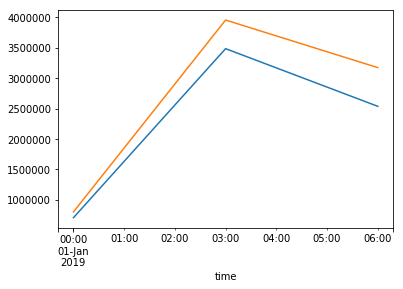

In [10]:
# df_plt=resampled_data.loc['2017-1-1':'2017-1-10']
df_plt=resampled_data.loc['2019-1-1':'2019-1-10']

df_plt['ssrd'].plot()
df_plt['ssrdc'].plot()

https://apps.ecmwf.int/codes/grib/param-db  (to know which variables with accumulated values)

https://confluence.ecmwf.int/pages/viewpage.action?pageId=111155330

These are the variables that attributed with accumulated fields:

"snow_depth", "surface_solar_radiation_downward_clear_sky", "surface_solar_radiation_downwards",  "total_precipitation"
vars=['sd', 'ssrdc', 'ssrd', 'tp']


In [11]:
df_acc=resampled_data[['ssrdc', 'ssrd']]
df_avg=df_acc/(3*3600)
# df_avg.head()
# df_acc
# 2017-01-01 00:00:00'
print(df_acc.head(9))
print(df_avg.head(9))

                            ssrdc         ssrd
time                                          
2019-01-01 00:00:00  8.019003e+05   706773.875
2019-01-01 00:30:00  1.327753e+06  1170054.875
2019-01-01 01:00:00  1.853606e+06  1633335.875
2019-01-01 01:30:00  2.379459e+06  2096616.750
2019-01-01 02:00:00  2.905312e+06  2559897.750
2019-01-01 02:30:00  3.431164e+06  3023178.750
2019-01-01 03:00:00  3.957017e+06  3486459.750
2019-01-01 03:30:00  3.826638e+06  3328459.500
2019-01-01 04:00:00  3.696258e+06  3170459.500
                          ssrdc        ssrd
time                                       
2019-01-01 00:00:00   74.250031   65.442024
2019-01-01 00:30:00  122.940102  108.338417
2019-01-01 01:00:00  171.630173  151.234802
2019-01-01 01:30:00  220.320251  194.131180
2019-01-01 02:00:00  269.010315  237.027573
2019-01-01 02:30:00  317.700378  279.923950
2019-01-01 03:00:00  366.390472  322.820343
2019-01-01 03:30:00  354.318298  308.190704
2019-01-01 04:00:00  342.246124  293.561066

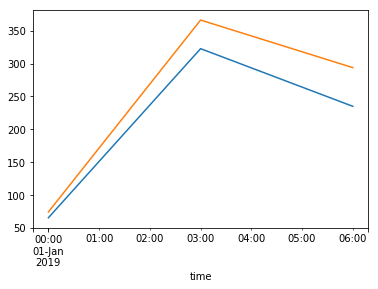

In [13]:
# df_plt=df_avg.loc['2017-1-1':'2017-1-10']
df_plt=df_avg.loc['2019-1-1':'2019-1-10']

df_plt['ssrd'].plot()
df_plt['ssrdc'].plot()

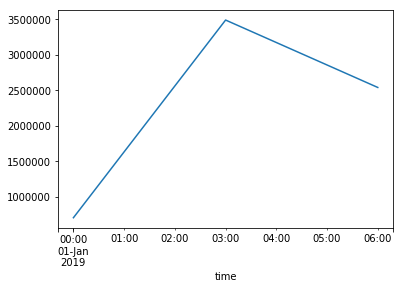

In [14]:
# df_plt=resampled_data['2017-1-1':'2018-12-31']
df_plt=resampled_data['2019-1-1':'2019-12-31']

df_plt['ssrd'].plot()
# df_plt['ssrdc'].plot()

In [15]:
resampled_data[['ssrdc', 'ssrd']]=df_avg
resampled_data.head(9)

,ssrdc,ssrd,tp
time,,,
2019-01-01 00:00:00,74.250031,65.442024,0.000141
2019-01-01 00:30:00,122.940102,108.338417,0.000139
2019-01-01 01:00:00,171.630173,151.234802,0.000136
2019-01-01 01:30:00,220.320251,194.131180,0.000134
2019-01-01 02:00:00,269.010315,237.027573,0.000131
2019-01-01 02:30:00,317.700378,279.923950,0.000129
2019-01-01 03:00:00,366.390472,322.820343,0.000127
2019-01-01 03:30:00,354.318298,308.190704,0.000129
2019-01-01 04:00:00,342.246124,293.561066,0.000131


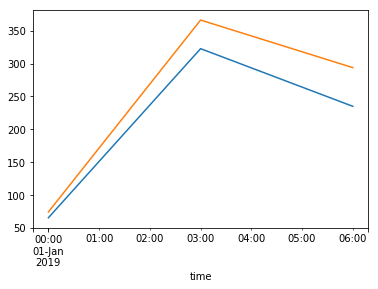

In [18]:
# df_plt=df_avg.loc['2017-1-1':'2017-1-10']
df_plt=resampled_data.loc['2019-1-1':'2019-1-10']

df_plt['ssrd'].plot()
df_plt['ssrdc'].plot()

In [16]:
# resampled_data.to_csv('Hokk_Ens_Aggreg_S1_S2_2017_2018.csv')

In [19]:
res_dx=pd.to_datetime(resampled_data.index.strftime('%Y-%m-%d %H:%M:%S'))
res_dx_utc=res_dx.tz_localize('UTC')
res_jp=res_dx_utc.tz_convert('Japan')
form_res_jp=res_jp.strftime('%Y-%m-%d %H:%M:%S')
# print(res_dx)
# print(res_dx_utc)
# print(res_jp)
# print(form_res_jp)

In [20]:
resampled_data.insert(0, 'DATE', res_jp.date)
resampled_data.insert(1, 'TIME', res_jp.time)

resampled_data.head()

,DATE,TIME,ssrdc,ssrd,tp
time,,,,,
2019-01-01 00:00:00,2019-01-01,09:00:00,74.250031,65.442024,0.000141
2019-01-01 00:30:00,2019-01-01,09:30:00,122.940102,108.338417,0.000139
2019-01-01 01:00:00,2019-01-01,10:00:00,171.630173,151.234802,0.000136
2019-01-01 01:30:00,2019-01-01,10:30:00,220.320251,194.131180,0.000134
2019-01-01 02:00:00,2019-01-01,11:00:00,269.010315,237.027573,0.000131


In [21]:
### resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat43_2017_18.csv')  #just 1 latitude 43
### resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat42_44_2017_18.csv') #here latitude ranges from 42-44
# resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat42_44_Jan_2019.csv')  #just 1 latitude 43
